In [94]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
filename = "/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/tp-4/data.csv"

In [96]:
def filter_word(word):
    word = word.replace(" ", "")
    word = word.replace("--", "-")
    word = word.upper()
    return word.replace("\\.", "")

In [97]:
co_autores = []
autores = []
lobos_solitarios = []

with open(filename,'r') as f:
    for line in f:
        line = line.split(',')
        line = line[3].split('&')
        cleaned_line = [filter_word(w) for w in line]
        if len(cleaned_line) > 1:
            co_autores.append(cleaned_line)
            for i in cleaned_line:
                autores.append(i)
        else:
            lobos_solitarios.append(cleaned_line)

autores= list(set(autores))

In [98]:
autores_size = len(autores)
adys = np.zeros((autores_size,autores_size))
co_autores_data = pd.DataFrame(data=adys, columns=autores, index=autores)
co_autores_data.max()

lista_de_tuplas=[]
for TUPLA in co_autores:
    pares=list(itertools.combinations(TUPLA, 2))
        
    for i in pares:
        lista_de_tuplas.append(i)
        co_autores_data[i[0]][i[1]]=co_autores_data[i[0]][i[1]]+1
        co_autores_data[i[1]][i[0]]=co_autores_data[i[1]][i[0]]+1
        
lista_de_tuplas = list(set(lista_de_tuplas))

In [116]:
def obtener_subgrafo(el_grafo, inicial, iteraciones):
#    print "iteracion: " + str(iteraciones)
#    print len(el_grafo)
    grafo=el_grafo[:]
    subgrafo=[]
    if(iteraciones>0):
        adys=[]
        for arista in grafo:
            if(arista[0]==inicial):
                #print "AOKI found"
                subgrafo.append(arista)
                grafo.remove(arista)
                adys.append(arista[1])
            else:
                if(arista[1]==inicial):
                    #print "AOKI found"
                    subgrafo.append(arista)
                    grafo.remove(arista)
                    adys.append(arista[0])
        for nodo in adys:
            #sub,grafo = obtener_subgrafo(grafo, nodo, iteraciones-1)
            res = obtener_subgrafo(grafo, nodo, iteraciones-1)
            subgrafo = subgrafo + res
            #subgrafo = subgrafo + sub

    return list(set(subgrafo))

In [117]:
#len(obtener_subgrafo(nueva, "AOKI", 3))
#l_de_tuplas = lista_de_tuplas
sub_grafo = obtener_subgrafo(lista_de_tuplas , "AOKI", 5)

In [118]:
len(sub_grafo)

3478

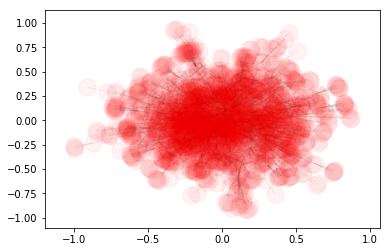

In [119]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(sub_grafo)
nx.draw_networkx(G, alpha=0.05, with_labels=False)
#plt.draw()
#plt.show()

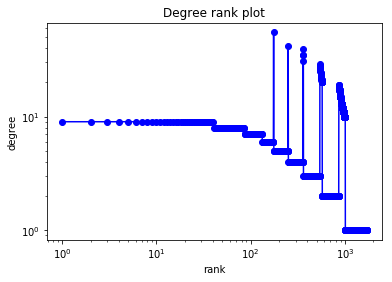

In [120]:
degree_sequence=sorted(np.array(nx.degree(G))[:,1],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

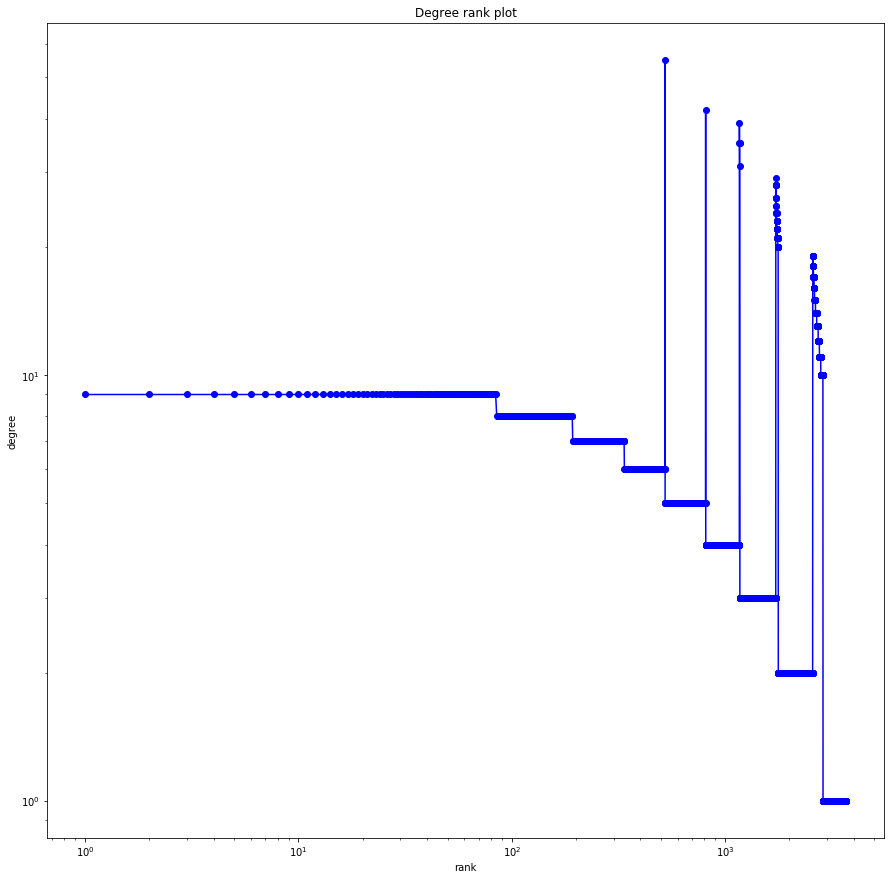

In [122]:
G = nx.Graph()
G.add_edges_from(lista_de_tuplas)
degree_sequence=sorted(np.array(nx.degree(G))[:,1],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
plt.figure(figsize=(15,15))

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

## Version Joaco

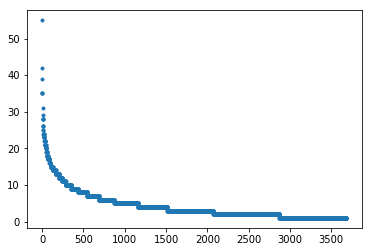

In [11]:
#Este grafico muestra los nodos pesados por degree. No es el punto 2 (màs abajo)
# Reducir el bineo de los histogramas

degrees = np.array(nx.degree(G))[:,1]
degrees
rango = range(0,len(degrees))
degrees = [int(d) for d in degrees]
degrees = sorted(degrees, reverse=True)
#plt.yscale('log')
plt.plot(rango, degrees,'.')

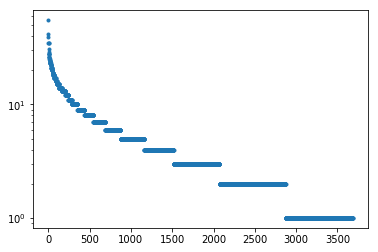

In [12]:
plt.clf()
plt.semilogy(rango, degrees, '.')
#plt.yscale('log')

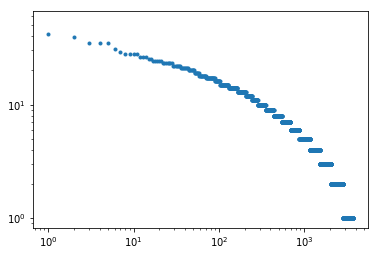

In [13]:
plt.clf()
plt.plot(rango, degrees,'.')
plt.yscale('log')
plt.xscale('log')

## Version histogramas

In [14]:
values, bins = np.histogram(co_autores_data.sum(axis=0))

In [15]:
values

array([3329,  265,   66,   15,    1,    2,    0,    4,    1,    1])

In [16]:
bins

array([   1. ,   17.6,   34.2,   50.8,   67.4,   84. ,  100.6,  117.2,
        133.8,  150.4,  167. ])

In [17]:
nuevos_bins = []
for i in range(0, len(bins)-1):
    bins_i = (bins[i] + bins[i + 1])/float(2)
    nuevos_bins.append(bins_i)

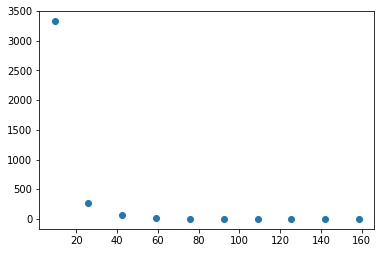

In [18]:
plt.plot(nuevos_bins, values, 'o')
plt.show()

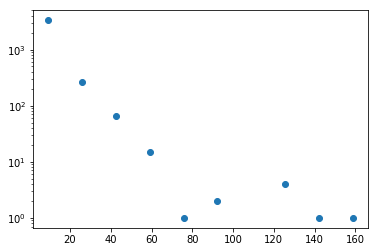

In [19]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.show()

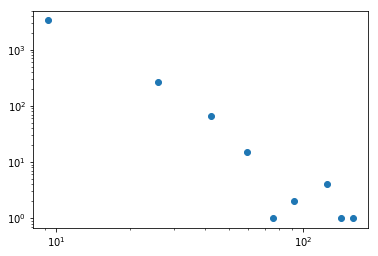

In [20]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.xscale("log")
plt.show()

# componentes_conexas

In [133]:
componentes_conexas = list(nx.connected_components(G))

In [137]:
len(componentes_conexas)

224

In [190]:
len(componentes_conexas[0])

3046

In [124]:
cardinal = [ len(l) for l in componentes_conexas]
print sum(cardinal)
maximo = max(cardinal)
maximo

3684


3046

In [191]:
len(autores)

3684

# componente gigante

In [158]:
componente_gigante = list(componentes_conexas[cardinal.index(maximo)])

In [413]:
def cantidad_de_vecinos():
    import random as rd
    iteraciones=6
    cant_personas=10
    autores_rd = [componente_gigante[rd.randint(0,len(componente_gigante))] for i in range(0, cant_personas)]

    autores_x_profundidad = np.zeros((cant_personas,iteraciones))

    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            subgrafo = obtener_subgrafo(lista_de_tuplas, autores_rd[i], j)
            G_i = nx.Graph()
            G_i.add_edges_from(subgrafo)
            cantidad_de_vec = len(G_i.nodes())
            autores_x_profundidad[i][j] = int(cantidad_de_vec)

    print 'Totales'
    print autores_x_profundidad[:,1:]
    
    for i in range(0,len(autores_rd)):
        for j in range(1,iteraciones):
            for k in range(0,j):
                autores_x_profundidad[i][j] = autores_x_profundidad[i][j] - autores_x_profundidad[i][k]
    print 'Por nivel'
    print autores_x_profundidad[:,1:]
    print "Los autores fueron: ", autores_rd

In [414]:
cantidad_de_vecinos()

Totales
[[    3.     9.    47.   203.   792.]
 [    3.    10.    35.   111.   403.]
 [    4.    26.   104.   411.  1288.]
 [    9.    16.    33.    62.   179.]
 [    2.    19.   177.   741.  1746.]
 [    5.    17.    78.   288.   921.]
 [    6.    35.   197.   820.  1815.]
 [    2.    12.   105.   508.  1434.]
 [    4.     9.    17.    62.   174.]
 [    3.    20.    82.   405.  1291.]]
Por nivel
[[    3.     6.    38.   156.   589.]
 [    3.     7.    25.    76.   292.]
 [    4.    22.    78.   307.   877.]
 [    9.     7.    17.    29.   117.]
 [    2.    17.   158.   564.  1005.]
 [    5.    12.    61.   210.   633.]
 [    6.    29.   162.   623.   995.]
 [    2.    10.    93.   403.   926.]
 [    4.     5.     8.    45.   112.]
 [    3.    17.    62.   323.   886.]]
Los autores fueron:  ['KOKTAVA', 'MATSUI', 'HARANO', 'DIVINCENZO', 'CHERKIS', 'PU', 'ERLICH', 'ZEID', 'PINTO', 'ACERBI']


## Graficar los dos tipos de graficos
Para ambos tomar un valor promedio y graficarlo pa comparar
Discutir

## Ejercicio 5
#### Clustering Coeficient

In [431]:
componentes_conexas = list(nx.connected_components(G))
contenedor_ggigante = componentes_conexas[0]
A = nx.clustering(G,contenedor_ggigante)
#print len(list(A.values))
#print (A.values())

B = nx.average_clustering(G, contenedor_ggigante)
print B

0.483770334643


#### Shortest Path Length

In [436]:
subgraph = G.subgraph(contenedor_ggigante)
SPL = nx.average_shortest_path_length(subgraph)
print SPL

In [437]:
SPL

6.08549326312362

###### el spl es aproximadamente 6, lo que significa que hacen falta 6 autores para ser co-autor de cualquier otro científico, por lo tanto la componente gigante tiene estructura de mundo pequeño.

In [444]:
degree_dist = np.average(values)
print degree_dist                        
len(list(subgraph.node))


368.4


3046

In [471]:
d = nx.degree(subgraph)
d = np.array(d)
d = d[:,1].astype(np.float)
degree_random = np.mean(d)
random_graph = nx.random_degree_sequence_graph(list(d.astype(np.int)))
random_graph_2 = nx.random_regular_graph(int(degree_random), len(subgraph.nodes()), seed=None)

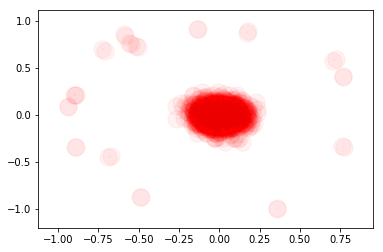

In [473]:
nx.draw_networkx(random_graph, alpha=0.05, with_labels=False)

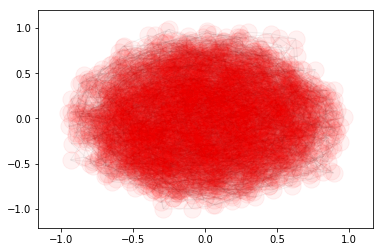

In [474]:
fnx.draw_networkx(random_graph_2, alpha=0.05, with_labels=False)

Falta hacer el calculo de C y de L (shortest path length) para alguna (o las dos) de los random graphs que generamos. Ahi decimos que C es chico y que L es alto y que el nuestro es mejor

### 6 . "Estrellas"

In [476]:
dicc_betw = nx.betweenness_centrality(subgraph)


[0.005457941831082661,
 0.0,
 0.00038820974525805756,
 0.004875083793045675,
 7.81059456747401e-05,
 0.002859357780726616,
 0.0,
 0.0,
 0.003573633933869039,
 0.00037689317091514786,
 0.0,
 0.0,
 0.007042636289255878,
 0.0,
 0.0,
 0.0,
 0.00023788640411335365,
 0.0,
 0.001969148708919428]

In [482]:
values_betw_max= sorted(dicc_betw.values(), reverse = True)
#list(dicc_betw.values())[1:20]

In [483]:
values_betw_max

[0.07770887792507228,
 0.054832642660652166,
 0.05102930219072023,
 0.04044246065238775,
 0.0352888073787089,
 0.03345414517307276,
 0.0333801615860204,
 0.03148907081564816,
 0.030754302387256186,
 0.03040398228093612,
 0.030270907328132576,
 0.03005172215103958,
 0.02898971291138441,
 0.027819269432673037,
 0.02676892599209792,
 0.0262080543611584,
 0.025879941657334732,
 0.02528942398086746,
 0.02507810265995563,
 0.024065670863144623,
 0.021965070578770264,
 0.021707014850605773,
 0.02149711496917335,
 0.02145407507360965,
 0.021069575471563667,
 0.020406817631155674,
 0.01973001110015688,
 0.019482248957703546,
 0.01919674872680765,
 0.01884589200467481,
 0.01881209100144718,
 0.018784793028627893,
 0.01872957146382791,
 0.018712135295862325,
 0.01867965284022866,
 0.0184984247040971,
 0.0184055606092432,
 0.018306958734945717,
 0.01814253675823659,
 0.01795548922735312,
 0.017717542878838553,
 0.017337362709273784,
 0.01666804251162966,
 0.016521539213043734,
 0.01587742594055941

In [477]:
dicc_close = nx.closeness_centrality(subgraph)

In [485]:
values_close_max= sorted(dicc_close.values(), reverse = True)
values_close_max

[0.245129608758654,
 0.24299736653100312,
 0.23707567735907817,
 0.23540780827212987,
 0.23540780827212987,
 0.23513513513513515,
 0.23511697938383136,
 0.23317252469561223,
 0.23290500229463057,
 0.2328693790149893,
 0.23192931677964812,
 0.2319116527037319,
 0.23026315789473684,
 0.23024574669187145,
 0.22988071870753435,
 0.22932670582919115,
 0.2288441304674583,
 0.22858644245927484,
 0.22791916167664672,
 0.22688324267938306,
 0.2267818574514039,
 0.2266636891469406,
 0.22639405204460966,
 0.22632674297606659,
 0.2260746900289554,
 0.22525521526853085,
 0.22518858157077357,
 0.22449130050132704,
 0.22449130050132704,
 0.2242763497090668,
 0.22422680412371135,
 0.22421029379279878,
 0.2240618101545254,
 0.2239629302736099,
 0.2236668135742618,
 0.22356828193832598,
 0.22355186843844063,
 0.22253891690418767,
 0.22227899846704138,
 0.22213306098628538,
 0.22182559918408976,
 0.2216963960684383,
 0.2215351036740633,
 0.22142233856893542,
 0.22105263157894736,
 0.22100449992742052,
 0